In [12]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

import sklearn.datasets

In [13]:
class PCA:
    # Initialize the class
    def __init__(self, X, Z_dim):
        # Normalize
        self.Xmean = X.mean(0)
        X = X - self.Xmean

        self.X = X
        self.N = X.shape[0]
        self.Z_dim = Z_dim

        # Sample covariance matrix
        self.S = jnp.matmul(X.T,X)/(self.N-1)

    # Computes the eigendecomposition of the covariance
    def fit(self):
        values, vectors = jnp.linalg.eigh(self.S)
        idx = jnp.argsort(values)[::-1]
        self.values = values[idx[:self.Z_dim]]
        self.vectors = vectors[:,idx[:self.Z_dim]]

    # Encodes data into latent space
    def encode(self, X_star):
        X_star = X_star - self.Xmean
        Z = jnp.matmul(self.X, self.vectors)
        return Z

    # Decodes latent values back to physical space
    def decode(self, Z):
        X = jnp.matmul(Z, self.vectors.T)
        # De-normalize
        X = X + self.Xmean
        return X


In [14]:
# Load Iris data-set
X = sklearn.datasets.load_iris().data
y = sklearn.datasets.load_iris().target

In [15]:
Z_dim = 2
model = PCA(X, Z_dim)
model.fit()

Relative L2 reconstruction error: 3.557403e-02


Text(0, 0.5, '$z_2$')

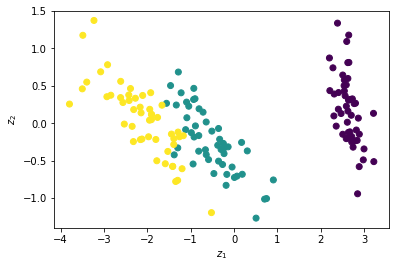

In [16]:
Z = model.encode(X)
X_star = model.decode(Z)

error = jnp.linalg.norm(X-X_star,2)/jnp.linalg.norm(X,2)
print('Relative L2 reconstruction error: %e' % (error))

# Plot the projection onto the first two principal components
plt.figure(1)
plt.scatter(Z[:,0],Z[:,1], c = y)
plt.xlabel('$z_1$')
plt.ylabel('$z_2$')